# Сборный проект - 1

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Алгоритм действий

#### Шаг 1. Откройте файл с данными и изучите общую информацию
#### Шаг 2. Подготовьте данные
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы.
* Обработайте пропуски при необходимости:
 * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
 * Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
 
#### Шаг 3. Проведите исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Шаг 4. Составьте портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Шаг 6. Напишите общий вывод

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
def df_info(df):
    """вывод базовой инфы по датафрейму"""
    df.info()
    display(df.describe())
    display(df)

In [3]:
# games_df = pd.read_csv('datasets/games.csv',',') # локально
games_df = pd.read_csv('/datasets/games.csv',',') # в ЯП
df_info(games_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


### Первый взгляд на данные
* В продажах нет пропусков - это хорошо!
* В имени и жанре 2 пропуска. Посмотрим и подчистим.
* User_Score почему-то не число. Надо будет разобраться
* В годе релиза почти три сотни пропусков. Это плохо.

In [4]:
# удаляем две древние игрушки без имени. Они же и без жанра
display(games_df.query('Name != Name'))
games_df.query('Name == Name', inplace = True)
games_df.reset_index(inplace = True, drop = True)
display(games_df.query('Name != Name'))

df_info(games_df)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16444.00,16713.00,16713.00,16713.00,16713.00,8137.00
mean,2006.49,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16709,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [5]:
games_df.columns = games_df.columns.str.lower()

games_df['year_of_release'] = games_df['year_of_release'].fillna(0).astype('int')
display(games_df.query('year_of_release == 0')['platform'].value_counts())
games_df = games_df.query('year_of_release != 0').reset_index(drop = True)
games_df

Wii     34
PS2     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


#### Зачистка пустого года
Имеем примерно 270 записей с пустым годом релиза. Но если посмотреть на платформы, то можно предположить, что это очень старые записи - нет ни одной XBox One или  PS4 (обе вышли в 2013). Без особого сожаления можно от этих записей избавиться, тем более что их всего 1,6% от общего числа.

In [6]:
# float64
games_df['user_score'].where(games_df['user_score'] != "tbd", np.nan, inplace = True)
games_df['user_score'] = games_df['user_score'].astype('float64')

games_df['rating'].fillna('Not rated', inplace = True)
games_df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,Not rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,Not rated
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,Not rated
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,Not rated
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,Not rated
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,Not rated


In [7]:
# апроксимация оценок для игр, выпущенных на нескольких платформах.
score_df = games_df.groupby('name').agg(\
                                           critic_mean = ('critic_score','mean'),\
                                           user_mean = ('user_score','mean'),\
                                           count = ('name','count')\
                                       ).reset_index()

# подчищаем df со средними оценками, для более быстрого последующего прохождения по циклу
# удаляем игры, которые только для одной платформы
score_df.query('count>1', inplace = True)
# и игры, для которых нет обеих оценок
score_df.query('critic_mean == critic_mean or user_mean == user_mean', inplace = True)

for index, row in score_df.iterrows():    
    name = row['name']
    critic_mean = row['critic_mean']
    user_mean = row['user_mean']
    
    games_df.loc[games_df['name'] == name,'critic_score'] = \
        games_df.loc[games_df['name'] == name,'critic_score'].fillna(critic_mean)
    games_df.loc[games_df['name'] == name,'user_score'] = \
        games_df.loc[games_df['name'] == name,'user_score'].fillna(user_mean)
        
display(games_df.describe())   

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.00,16444.00,16444.00,16444.00,16444.00,8922.00,8524.00
mean,2006.49,0.26,0.15,0.08,0.05,68.79,7.09
std,5.88,0.82,0.51,0.31,0.19,14.09,1.50
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.30
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.40
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70


#### Заполнение оценок для игр, выпущенных на нескольких платформах
Если игра выпущена на нескольких платформах и для некоторых платформ отсутствуют оценки, то можно их апроксимировать из оценок на других платформах - вычисляем среднюю оценку по игре на всех платформах и используем это значение.

In [8]:
games_df['full_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,Not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,Not rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,Not rated,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,Not rated,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,Not rated,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,Not rated,0.01


## Общие выводы по исходным данным и их подготовке
1. Выкинули две строки с отсутствующими названием игры и жанром.
2. Выкинули 270 строк с отсутствующим годом релиза
3. Оценки пользователей привели к типу int, значение tbd заменили на nan
4. Для игр, которые вышли на нескольких платформах, использовали среднее значение имеющихся оценок для заполнения отсутствующих оценок.
5. Добавили столбец с суммарными продажами по всем регионам.

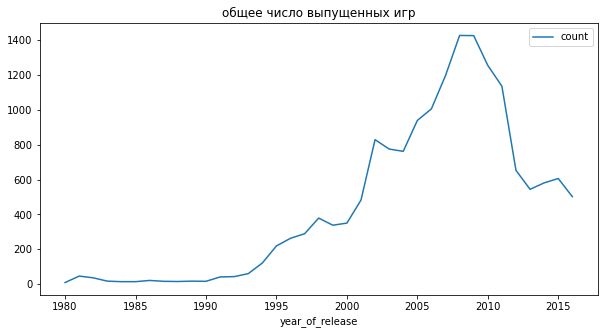

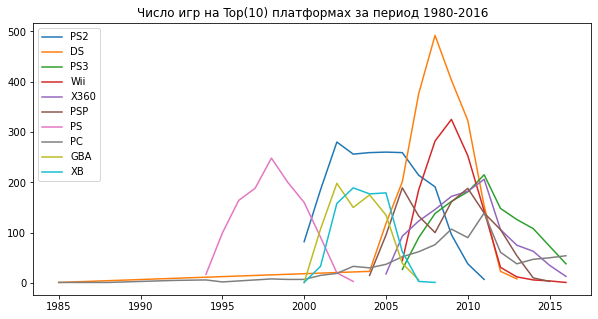

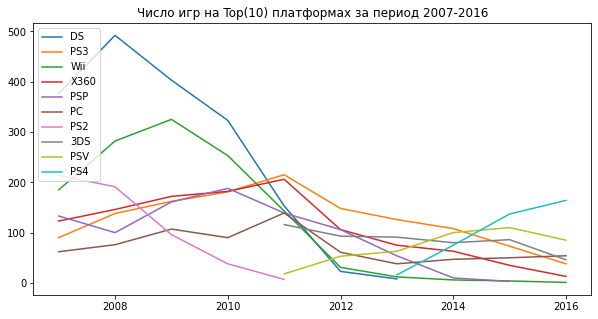

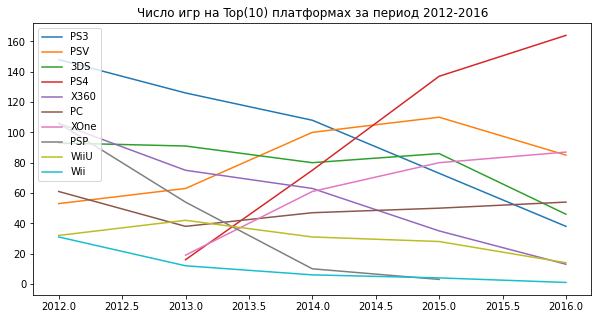

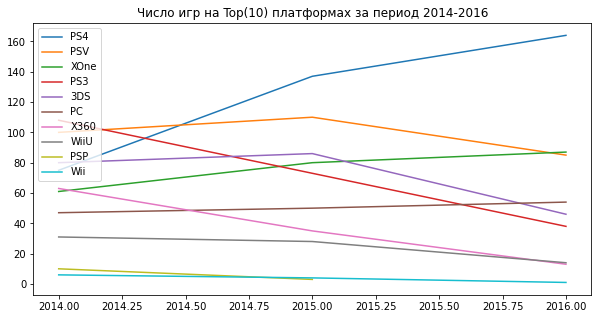

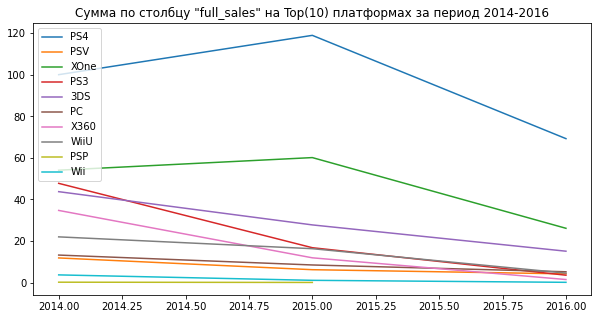

In [9]:
group_year_df = games_df.groupby('year_of_release').agg(count = ('year_of_release','count')).reset_index()

ax = group_year_df.plot( x = 'year_of_release', y = 'count', figsize = (10,5))
ax.set_title('общее число выпущенных игр')
plt.show()

def TopCountPlot(df, N=10):
    group_platform_df = df.groupby('platform').agg( count = ('year_of_release','count'))\
                                                .reset_index()\
                                                .sort_values('count', ascending = False)\
                                                .head(N)
    min_year = df['year_of_release'].min()
    max_year = df['year_of_release'].max()
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_title('Число игр на Top({2}) платформах за период {0}-{1}'.format(min_year, max_year, N))
    for index, row in group_platform_df.iterrows():
        platform = row['platform']
        platform_df = df.query('platform == @platform').groupby('year_of_release')\
                                                            .agg(count = ('year_of_release','count')).reset_index()
        ax.plot(platform_df['year_of_release'], platform_df['count'])

    ax.legend(group_platform_df['platform'], loc='upper left')
    plt.show()    

def TopSumColumnPlot(df, column, N=10):
    group_platform_df = df.groupby('platform').agg( count = ('year_of_release','count'))\
                                                .reset_index()\
                                                .sort_values('count', ascending = False)\
                                                .head(N)
    min_year = df['year_of_release'].min()
    max_year = df['year_of_release'].max()
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_title('Сумма по столбцу "{3}" на Top({2}) платформах за период {0}-{1}'.format(min_year, max_year, N, column))
    
    for index, row in group_platform_df.iterrows():
        platform = row['platform']
        platform_df = df.query('platform == @platform').groupby('year_of_release')\
                                                            .agg(sum = (column,'sum')).reset_index()
        ax.plot(platform_df['year_of_release'], platform_df['sum'])

    ax.legend(group_platform_df['platform'], loc='upper left')
    plt.show()    

TopCountPlot(games_df, 10)
TopCountPlot(games_df.query('year_of_release > 2006'))
TopCountPlot(games_df.query('year_of_release > 2011'))
TopCountPlot(games_df.query('year_of_release > 2013'))

games_actual_df = games_df.query('year_of_release > 2013').reset_index(drop = True)

TopSumColumnPlot(games_actual_df, column = 'full_sales')




#### Время жизни платформы, число игр, выручка
1. Видим, что время жизни платформы порядка 10 лет. Смотреть более долгий срок точно нет смысла. Повторим анализ, оставив данные с 2007г
2. Более внимательный взгляд видит, что платформы, актуальные в начале десятилетнего периода, к концу периода уже полностью теряют свою актуальность. Сократим интервал до 5 лет.
3. В пятилетнем интервале видны два явных восходящих тренда - PS4 и XOne. Так же наблюдается небольшой рост у PC. И интерес представляет PSV - тренд хоть и нисходящий, но всё же число игр большое.
4. Но всё же в пятилетнем интервале слишком большое влияние героев прошлых лет, которые к концу интервала уходят почти в 0. А вот на трёхлетнем картинка уже выглядит более-менее актуальной. **Зафиксируем датафрейм за 3 года как основу для будущего анализа.**
5. Данные по выручке подтверждают предыдущие выводы на основе числа игр - в топе PS4, XOne. Но так же неожиданно хорошо выглядит  выглядит 3DS.

##### Как итог, оставим в качестве перспективных следующие платформы: PS4, XOne, 3DS, PC, PSV.
Первые три включены за высокую выручку в последние годы. PC за растущий тренд. PSV скорее за компанию, для добивания топа до пяти. Вместо PSV можно так же взять WiiU - выручка за последний год там больше. Но это в любом случае будет уже выбор среди лузеров. 

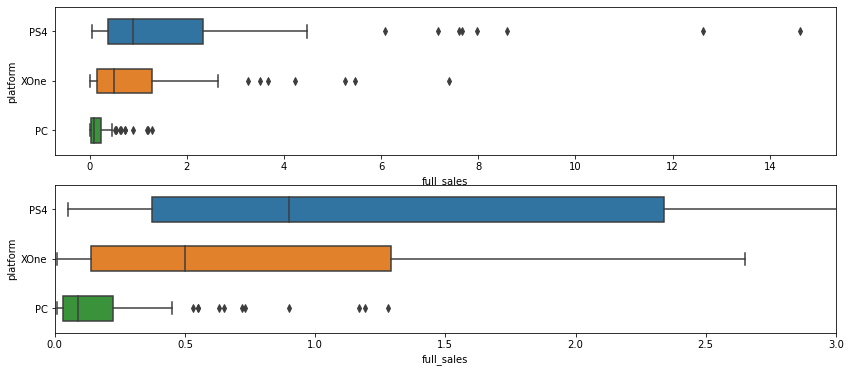

In [10]:
# отыщем игры, которые вышли на всех 3х платформах за актуальный период
games_3p_df = games_actual_df.query('platform in ("PS4", "XOne",  "PC")')
games_in_all_top_platform_df = games_3p_df\
                                    .groupby('name')\
                                    .agg(count = ('name','count'))\
                                    .reset_index()\
                                    .query('count==3')

ddf = games_in_all_top_platform_df.merge(games_3p_df, on='name', how='left')

fig, ax =plt.subplots(2, 1, figsize = (14,6))
sns.boxplot(y='platform', x='full_sales', data=ddf, orient="h", ax=ax[0], width = 0.5)

ax[1].set_xlim([0, 3]) 
sns.boxplot(y='platform', x='full_sales', data=ddf, orient="h", ax=ax[1], width = 0.5)
plt.show()

### Анализ одинаковых игр на разных платформах
Возьмём 3 мощные игровые платформы PS4, XOne и PC (3DS и PSV являются маломощными портативными платформами и игры там другие) и выделим игры, которые представлены одновременно на всех трёх платформах - таких игр всего 87. Зачищать выбросы на графике не буду, т.к. это реальные данные, в достоверности которых нет сомнений.

Видим, что в среднем, выручка с одной игры у PS4 заметно выше, чем у XOne, а у XOne выше чем у PC. 

================ PS4 ================


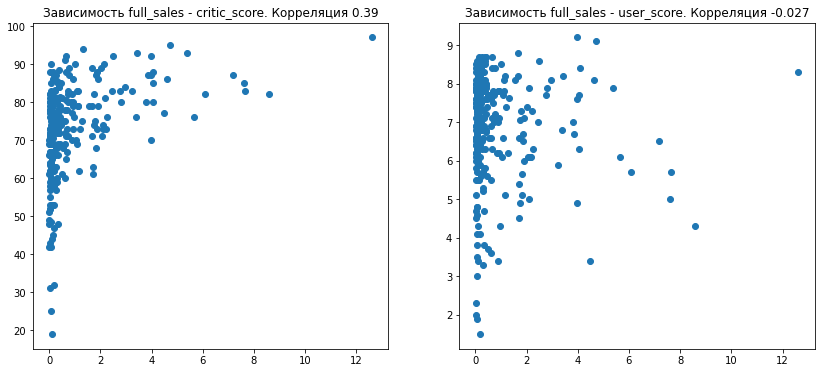

================ XOne ================


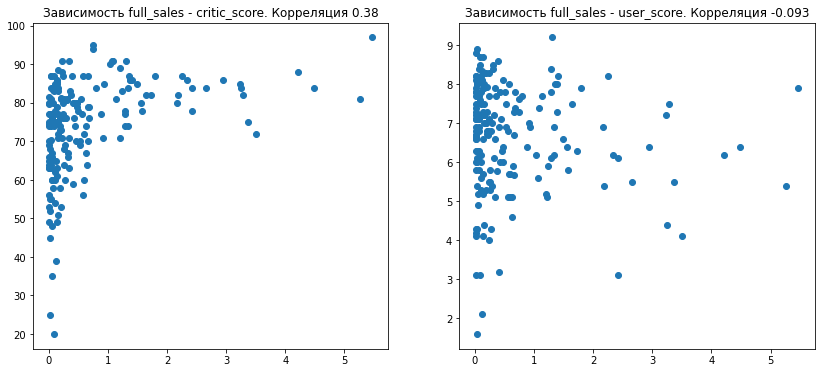

================ 3DS ================


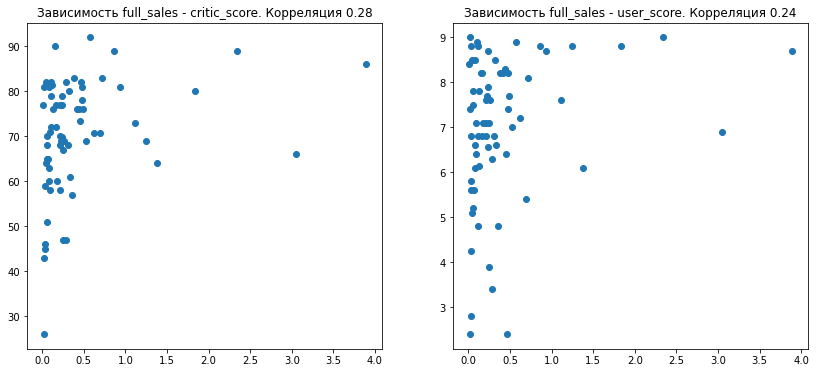

================ PC ================


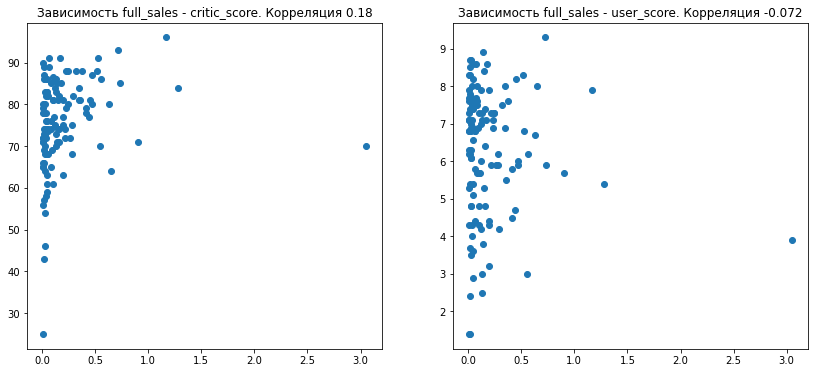

================ PSV ================


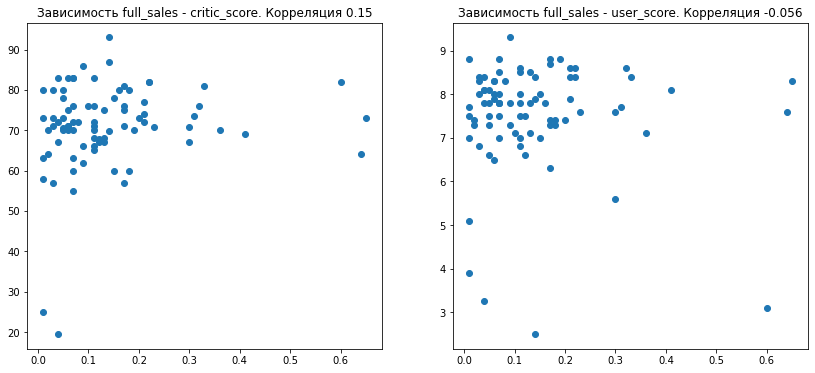

In [11]:
def plot_corr(df, col1, col2, ax):
    ax.scatter(col1, col2, data=df)
    ax.set_title('Зависимость {0} - {1}. Корреляция {2:.2}'.format(col1, col2, df[col1].corr(df[col2])))

for pl in ['PS4', 'XOne', '3DS', 'PC', 'PSV']:
    games_pl_df = games_actual_df.query('platform == @pl')
    fig, ax =plt.subplots(1, 2, figsize = (14,6))
    print('================', pl, '================')
    plot_corr(games_pl_df, 'full_sales', 'critic_score', ax[0])
    plot_corr(games_pl_df, 'full_sales', 'user_score', ax[1])
    plt.show()
    
    


### Корреляция оценок и продаж
1. Между оценками критиков и продажами наблюдается заметная корреляция в случае PS4 и XOne (коэффициент корреляции = 0,39 и 0,38). На остальных платформах корреляция менее выражена (0,15...0,28)
2. Зависимость между оценками пользователей и продажами слабо выражена на 3DS (коэффициент 0,24). На остальных платформах коэффициент корреляции близок к нулю.

In [12]:
genre_df = games_actual_df.groupby('genre')\
                            .agg(count = ('genre','count'), sum=('full_sales', 'sum'))\
                            .reset_index()\
                            .sort_values('sum')\
                            .reset_index(drop = True)
genre_df['avg_sum'] = genre_df['sum']/genre_df['count']
genre_df


,genre,count,sum,avg_sum
0,Puzzle,14,2.21,0.16
1,Strategy,37,3.96,0.11
2,Simulation,44,13.13,0.30
3,Adventure,185,17.55,0.09
4,Platform,38,18.09,0.48
5,Racing,69,27.52,0.40
6,Fighting,60,28.22,0.47
7,Misc,113,37.55,0.33
8,Role-Playing,221,101.44,0.46
9,Sports,161,109.48,0.68


### Распределение по жанрам
1. Максимальные суммарные сборы по жанрам в Shooter (171) и Action(199), минимальные в Puzzle (2,2) и Strategy (3,96)
2. Максимальные средние сборы в пересчёте на одну игру в с большим отрывом у Shooter (1,34), минимальные у Adventure (0,09) и Strategy (0,11)

,platform,na_sales,eu_sales,jp_sales,full_sales
0,PSP,0.00,0.00,0.36,0.36
1,Wii,2.08,2.59,0.00,5.07
2,PSV,2.52,3.53,14.54,22.40
3,PC,7.23,17.97,0.00,27.05
4,WiiU,19.36,13.15,7.31,42.98
5,X360,28.30,15.49,0.08,48.22
6,PS3,22.05,25.54,11.22,68.18
7,3DS,22.64,16.12,44.24,86.68
8,XOne,81.27,46.25,0.32,140.36
9,PS4,98.61,130.04,15.02,288.15


,genre,na_sales,eu_sales,jp_sales,full_sales
0,Puzzle,0.65,0.52,0.93,2.21
1,Strategy,0.98,1.79,0.95,3.96
2,Simulation,2.63,7.30,2.31,13.13
3,Adventure,5.64,6.49,3.60,17.55
4,Platform,6.79,6.80,2.69,18.09
5,Racing,8.74,14.13,1.76,27.52
6,Fighting,12.43,6.69,6.37,28.22
7,Misc,15.05,12.86,5.61,37.55
8,Role-Playing,33.47,28.17,31.16,101.44
9,Sports,46.13,45.73,3.26,109.48


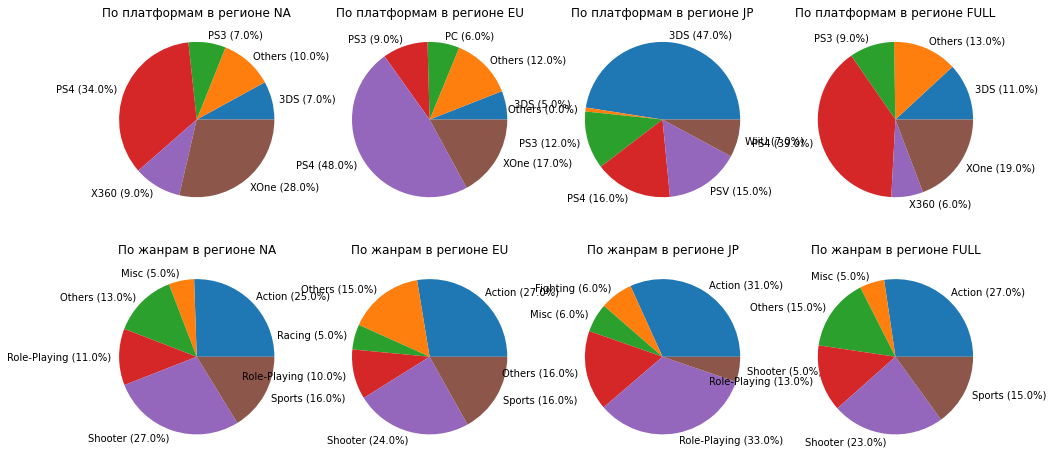

In [13]:
platform_df = games_actual_df.groupby('platform')\
                            .agg(na_sales = ('na_sales','sum'), eu_sales=('eu_sales', 'sum'),\
                                 jp_sales=('jp_sales', 'sum'), full_sales=('full_sales', 'sum'))\
                            .reset_index()\
                            .sort_values('full_sales')\
                            .reset_index(drop = True)
display(platform_df)
genre_df = games_actual_df.groupby('genre')\
                            .agg(na_sales = ('na_sales','sum'), eu_sales=('eu_sales', 'sum'),\
                                 jp_sales=('jp_sales', 'sum'), full_sales=('full_sales', 'sum'))\
                            .reset_index()\
                            .sort_values('full_sales')\
                            .reset_index(drop = True)
display(genre_df)

def Top5InRegion(df, region, ax, column, title):
    col = region.lower() + '_sales'
    ddf = df.sort_values(col, ascending = False).reset_index(drop=True)

    ddf['group'] = ddf.apply(lambda x: x[column] if x.name < 5 else 'Others', axis=1)
    dddf = ddf.groupby('group').agg(sales = (col,'sum')).reset_index()

    sum_sales = dddf['sales'].sum()

    dddf['labels'] = dddf.apply(lambda x: x['group'] + ' (' + str(np.floor(x['sales']/sum_sales*100)) +'%)', axis = 1)
    
    ax.pie(dddf['sales'], labels= dddf['labels'])
    ax.set_title(title + ' ' + region)
    
fig, ax =plt.subplots(2, 4, figsize = (16,8))

regions = ['NA','EU','JP', 'FULL']

for i in range(len(regions)):
    Top5InRegion(df = platform_df, region = regions[i], ax = ax[0][i], column = 'platform', title = 'По платформам в регионе')
    Top5InRegion(df = genre_df, region = regions[i], ax = ax[1][i], column = 'genre', title = 'По жанрам в регионе')





### Популярные платформы по регионам
* Картина по регионам различная. При этом если Северная Америка и Европа между собой имеют некоторое сходство, то Япония кардинально от них отличается.
* В NA и EU первая двойка одинаковая - PS4 и XOne с суммарной долей более 60%. Далее и там и там есть PS3 и 3DS. Дополнительно в EU в TOP5 попали PC, а в NA X360. Но доля платформ за пределами первой двойки не превышает 10%.
* В JP Top5 платформ захватили более 99% рынка, при этом в пятёрке нет привычного по остальным регионам XOne, а лидерство с 47% держит малопопулярная в других регионах 3DS. Лидер NA и EU PS4 довольствуется вторым местом в JP  с долей 16%. Остальные три места в пятёрке занимают PSV, PS3 и WiiU 

### Популярные жанры по регионам
* Ситуация несколько напоминает картинку по платформам - NA и EU похожи друг на друга, JP от них отличается. Но в случае жанров вариативность всё же не такая большая, как по платформам.
* В NA и EU 1-2 место с небольшой разницей и переменным успехом делят Action и Shooter, захватывая на двоих более 50% рынка. На третьем месте и там и там Sports, а на четвёртом Role-Playing. И только на пятом месте появляется отличие - в NA это место заняла категория Misc, а в EU Racing.
* В JP порядок другой: Role-Playing и Action занимают соответственно 1 и 2 место с суммарной долей 64%. Доли остальных жанров не превышают 6% и первая пятёрка заканчивается так: Fighting, Misc и Shooter.

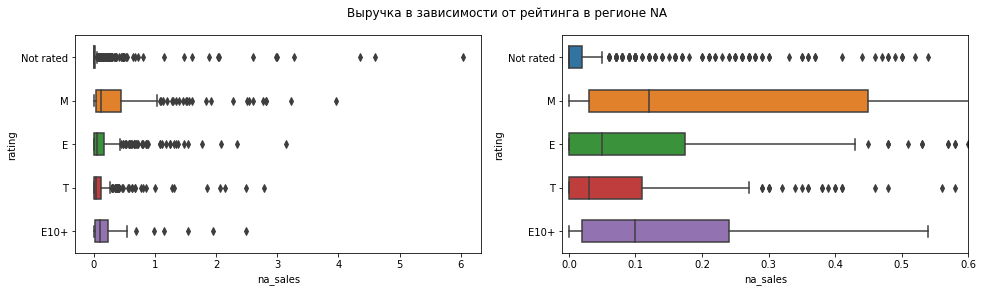

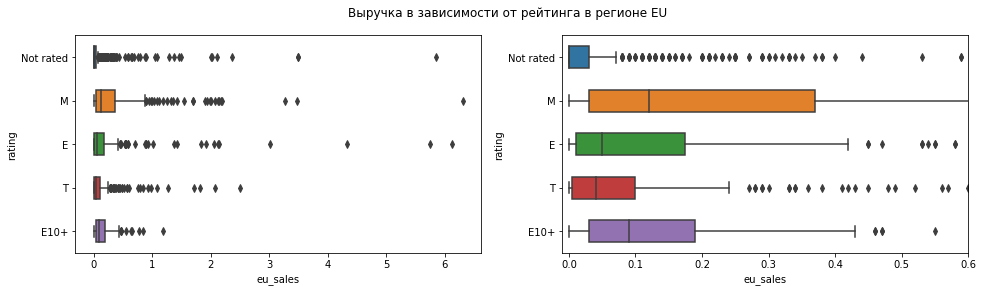

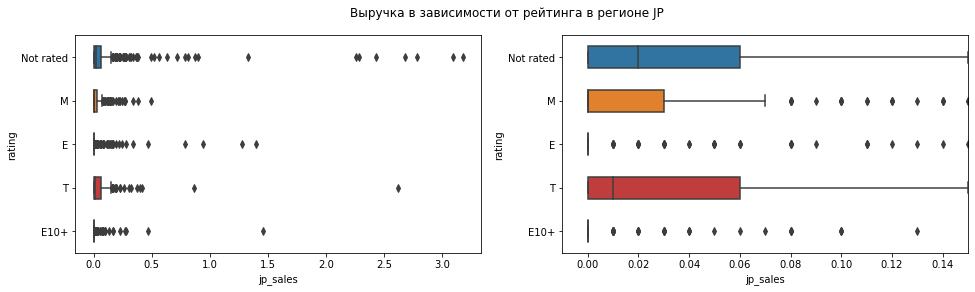

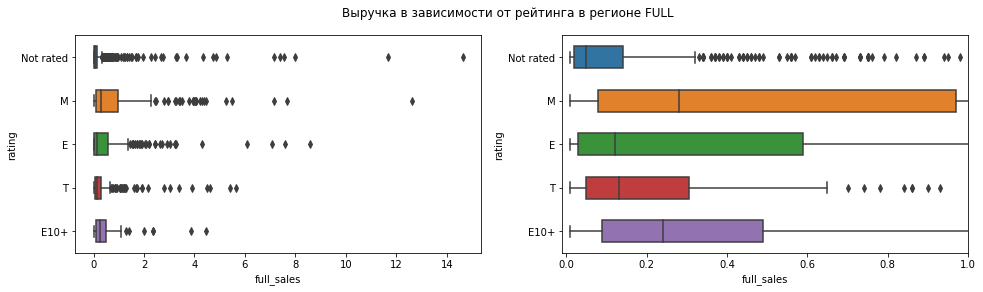

In [14]:
def box_plot_rating_in_region(region, ymax):
    col = region.lower() + '_sales'
    fig, ax =plt.subplots(1, 2, figsize = (16,4))
    fig.suptitle('Выручка в зависимости от рейтинга в регионе ' + region)
    
    
    sns.boxplot(y='rating', x=col, data=games_actual_df, orient="h", ax=ax[0], width = 0.5)

    ax[1].set_xlim([-.01, ymax]) 
    sns.boxplot(y='rating', x=col, data=games_actual_df, orient="h", ax=ax[1], width = 0.5)
    plt.show()

box_plot_rating_in_region('NA', ymax = .6)
box_plot_rating_in_region('EU', ymax = .6)
box_plot_rating_in_region('JP', ymax = .15)
box_plot_rating_in_region('FULL', ymax = 1)


### Влияние рейтинга на продажи
* В EU и NA (и в целом по миру) наличие рейтинга M или E10+ повышает шансы на большую выручку, а отсутствие рейтинга делает вероятность успешных продаж иллюзорной.
* В JP более предпочтительно иметь рейтинг T или не иметь рейтинга вообще.

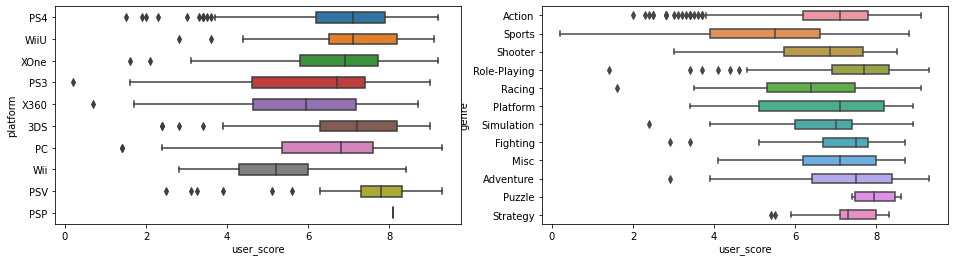


Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-значение: 0.0373
Отвергаем нулевую гипотезу

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
p-значение: 1.92e-23
Отвергаем нулевую гипотезу


In [15]:
def check_hypot(s1, s2, alpha, hypot_str):
    print()
    print('Гипотеза:', hypot_str)
    results = st.ttest_ind(s1, s2)
    print('p-значение: {:.3}'.format(results.pvalue))

    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

alpha = .05

df = games_actual_df.query('user_score == user_score')

fig, ax =plt.subplots(1, 2, figsize = (16,4))
sns.boxplot(y='platform', x='user_score', data=df, orient="h", width = 0.5, ax = ax[0])
sns.boxplot(y='genre', x='user_score', data=df, orient="h", width = 0.5, ax = ax[1])
plt.show()


check_hypot(df.query('platform == "XOne"')['user_score'], \
            df.query('platform == "PC"')['user_score'], \
            alpha, \
            'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

check_hypot(df.query('genre == "Action"')['user_score'], \
            df.query('genre == "Sports"')['user_score'], \
            alpha, \
            'Средние пользовательские рейтинги жанров Action и Sports одинаковые')


### Проверка гипотез
1. Гипотеза *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые* отвергнута. Но стоит заметить, что p-значение достаточно большое (0.0373) и при уменьшении значения alpha можно было бы получить и другой результат.
2. Гипотеза *Средние пользовательские рейтинги жанров Action и Sports одинаковые* отвергнута.

# Финальное резюме

1. Наиболее перспективные платформы в 2017 году PS4 и XBox One. Но так же не стоит сбрасывать со счетов PS3, PC и 3DS
2. Самые прибыльные жанры Action, Shooter и Sports.
3. Стоит обращать особое внимание на игры с рейтингом M, и E10+, а игры без рейтинга можно игнорировать.